## Manual Observation

Text: "I always fail at exams. Nothing ever works for me."

Observations:
- Uses absolutist words: always, nothing
- Strong emotional tone
- No factual reasoning
- No concrete details

Likely Thought Patterns:
- Absolutist: High
- Emotional: High
- Balanced: Low
- Rational: Low


In [3]:
import sys
import os

project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))
if project_root not in sys.path:
    sys.path.append(project_root)


In [4]:
from src.preprocessing import clean_text


In [5]:
text = "I always fail at exams. Nothing ever works for me."

print(text)


I always fail at exams. Nothing ever works for me.


# Thought Pattern Analysis – Text Playground

This notebook is used to manually explore how different writing styles
reflect different thought patterns.


In [7]:
from src.preprocessing import clean_text

sample_text = "I always fail at everything I do. Nothing ever works in my favor and I feel completely hopeless about my future."


cleaned = clean_text(sample_text)
print(cleaned)


i always fail at everything i do. nothing ever works in my favor and i feel completely hopeless about my future.


In [8]:
from src.preprocessing import clean_text
from src.feature_engineering import extract_cognitive_features

text = "I always fail at everything I do. Nothing ever works in my favor and I feel completely hopeless about my future."

cleaned = clean_text(text)

features = extract_cognitive_features(cleaned)
features


{'absolutist_ratio': 0.19047619047619047,
 'balanced_ratio': 0.0,
 'emotion_ratio': 0.0,
 'rational_ratio': 0.0,
 'first_person_ratio': 0.23809523809523808,
 'collective_person_ratio': 0.0,
 'avg_sentence_length': 10.5}

In [9]:
from src.preprocessing import clean_text
from src.feature_engineering import extract_cognitive_features
from src.scoring import score_thought_patterns

text = "I always fail at exams. Nothing ever works for me."
cleaned = clean_text(text)

features = extract_cognitive_features(cleaned)
scores = score_thought_patterns(features)

scores


{'Analytic_vs_Holistic': {'analytic': 0.25, 'holistic': 0.75},
 'Absolutist_vs_Balanced': {'absolutist': 0.6000000000000001, 'balanced': 0.0},
 'Emotional_vs_Rational': {'emotional': 0.0, 'rational': 0.0},
 'Concrete_vs_Abstract': {'concrete': 0.4, 'abstract': 0.0}}

In [10]:
from src.preprocessing import clean_text
from src.feature_engineering import extract_cognitive_features
from src.scoring import score_thought_patterns
from src.output_formatter import format_thought_patterns

text = "I always fail at exams. Nothing ever works for me."
cleaned = clean_text(text)

features = extract_cognitive_features(cleaned)
scores = score_thought_patterns(features)
readable = format_thought_patterns(scores)

readable


{'Analytic_vs_Holistic': {'analytic': 'Low', 'holistic': 'High'},
 'Absolutist_vs_Balanced': {'absolutist': 'Medium', 'balanced': 'Low'},
 'Emotional_vs_Rational': {'emotional': 'Low', 'rational': 'Low'},
 'Concrete_vs_Abstract': {'concrete': 'Medium', 'abstract': 'Low'}}

In [11]:
import pandas as pd

df = pd.DataFrame(readable).T
df


,analytic,holistic,absolutist,balanced,emotional,rational,concrete,abstract
Analytic_vs_Holistic,Low,High,NaN,NaN,NaN,NaN,NaN,NaN
Absolutist_vs_Balanced,NaN,NaN,Medium,Low,NaN,NaN,NaN,NaN
Emotional_vs_Rational,NaN,NaN,NaN,NaN,Low,Low,NaN,NaN
Concrete_vs_Abstract,NaN,NaN,NaN,NaN,NaN,NaN,Medium,Low


C:\Users\chell\AppData\Local\Temp\ipykernel_19380\404286160.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  plot_df = df.replace(level_map)


<Figure size 1000x500 with 0 Axes>

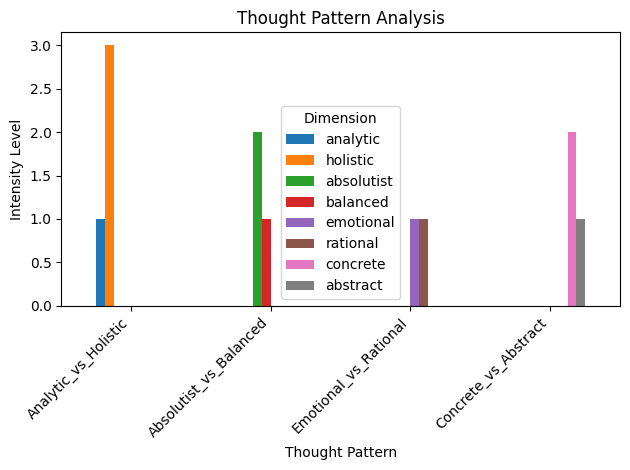

In [12]:
import matplotlib.pyplot as plt

# Convert readable output to numeric levels for plotting
level_map = {"Low": 1, "Medium": 2, "High": 3}

plot_df = df.replace(level_map)

plt.figure(figsize=(10, 5))
plot_df.plot(kind="bar")
plt.title("Thought Pattern Analysis")
plt.ylabel("Intensity Level")
plt.xlabel("Thought Pattern")
plt.xticks(rotation=45, ha="right")
plt.legend(title="Dimension")
plt.tight_layout()
plt.show()


In [13]:
import pandas as pd

data = [
    {
        "text": "I always fail. Nothing ever works for me.",
        "absolutist": 1,
        "balanced": 0,
        "emotional": 1,
        "rational": 0
    },
    {
        "text": "Sometimes things are difficult, but I can improve.",
        "absolutist": 0,
        "balanced": 1,
        "emotional": 0,
        "rational": 1
    },
    {
        "text": "Based on the data, this method performs better.",
        "absolutist": 0,
        "balanced": 1,
        "emotional": 0,
        "rational": 1
    },
    {
        "text": "Everyone is against me and I feel very sad.",
        "absolutist": 1,
        "balanced": 0,
        "emotional": 1,
        "rational": 0
    }
]

df_ml = pd.DataFrame(data)
df_ml


,text,absolutist,balanced,emotional,rational
0,I always fail. Nothing ever works for me.,1,0,1,0
1,"Sometimes things are difficult, but I can impr...",0,1,0,1
2,"Based on the data, this method performs better.",0,1,0,1
3,Everyone is against me and I feel very sad.,1,0,1,0


In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer

X_text = df_ml["text"]
y = df_ml[["absolutist", "balanced", "emotional", "rational"]]

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(X_text)

X.shape


(4, 29)

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.multioutput import MultiOutputClassifier

model = MultiOutputClassifier(LogisticRegression(max_iter=1000))
model.fit(X, y)

predictions = model.predict(X)
predictions


array([[1, 0, 1, 0],
       [0, 1, 0, 1],
       [0, 1, 0, 1],
       [1, 0, 1, 0]])

In [16]:
test_text = ["I feel like nothing is improving and I am very frustrated"]

X_test = vectorizer.transform(test_text)
ml_prediction = model.predict(X_test)

ml_prediction


array([[1, 0, 1, 0]])

In [17]:
labels = ["absolutist", "balanced", "emotional", "rational"]

prediction_dict = dict(zip(labels, ml_prediction[0]))
prediction_dict


{'absolutist': np.int64(1),
 'balanced': np.int64(0),
 'emotional': np.int64(1),
 'rational': np.int64(0)}

In [18]:
# Rule-based prediction
from src.preprocessing import clean_text
from src.feature_engineering import extract_cognitive_features
from src.scoring import score_thought_patterns
from src.output_formatter import format_thought_patterns

rule_output = format_thought_patterns(
    score_thought_patterns(
        extract_cognitive_features(
            clean_text(test_text[0])
        )
    )
)

rule_output


{'Analytic_vs_Holistic': {'analytic': 'Medium', 'holistic': 'Medium'},
 'Absolutist_vs_Balanced': {'absolutist': 'Low', 'balanced': 'Low'},
 'Emotional_vs_Rational': {'emotional': 'Low', 'rational': 'Low'},
 'Concrete_vs_Abstract': {'concrete': 'Low', 'abstract': 'Low'}}